In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [166]:
import pandas as pd
import numpy as np

In [3]:
height_ds = pd.read_csv('/content/drive/MyDrive/Data Projects/Height vs Weather/average-height-by-country-2024.csv')


In [4]:
height_ds.head(5)

,country,AverageHeightBoysAge19,AverageHeightGirlsAge19,AvgHgtBoysAge19,AvgHgtGirlsAge19,AverageHeightBoysAge15,AverageHeightGirlsAge15,AverageHeightBoysAge10,AverageHeightGirlsAge10,AverageHeightBoysAge5,AverageHeightGirlsAge5
0,India,166.50,155.18,166.50,155.18,159.01,152.39,132.57,132.85,107.07,107.19
1,China,175.66,163.46,175.66,163.46,171.23,162.44,141.87,143.40,113.41,114.91
2,Indonesia,166.26,154.36,166.26,154.36,160.52,153.02,132.30,133.46,107.83,107.55
3,Pakistan,167.33,154.77,167.33,154.77,161.13,152.45,133.97,133.03,108.11,105.45
4,Nigeria,171.55,158.14,171.55,158.14,160.12,154.20,133.01,132.85,109.79,107.59


In [5]:
temperature_ds = pd.read_csv('/content/drive/MyDrive/Data Projects/Height vs Weather/average-monthly-surface-temperature.csv')

In [6]:
temperature_ds.head(5)

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1
0,Afghanistan,AFG,1940,1940-01-15,-2.032494,11.327695
1,Afghanistan,AFG,1940,1940-02-15,-0.733503,11.327695
2,Afghanistan,AFG,1940,1940-03-15,1.999134,11.327695
3,Afghanistan,AFG,1940,1940-04-15,10.199754,11.327695
4,Afghanistan,AFG,1940,1940-05-15,17.942135,11.327695


In [7]:
metadata_ds = pd.read_json('/content/drive/MyDrive/Data Projects/Height vs Weather/average-monthly-surface-temperature.metadata.json')

In [8]:
metadata_ds.head(20)

,chart,columns,dateDownloaded,activeFilters
title,Average monthly surface temperature,NaN,2024-12-16,NaN
subtitle,The temperature of the air measured 2 meters a...,NaN,2024-12-16,NaN
citation,Contains modified Copernicus Climate Change Se...,NaN,2024-12-16,NaN
originalChartUrl,https://ourworldindata.org/grapher/average-mon...,NaN,2024-12-16,NaN
selection,[World],NaN,2024-12-16,NaN
Average surface temperature,NaN,"{'titleShort': 'Annual average', 'titleLong': ...",2024-12-16,NaN


In [9]:
temperature_ds.dtypes

,0
Entity,object
Code,object
year,int64
Day,object
Average surface temperature,float64
Average surface temperature.1,float64


In [10]:
temperature_2023_ds = temperature_ds[temperature_ds['year'] == 2023]

In [11]:
temperature_2023_ds.head(5)

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1
996,Afghanistan,AFG,2023,2023-01-15,-4.335608,13.836377
997,Afghanistan,AFG,2023,2023-02-15,4.187041,13.836377
998,Afghanistan,AFG,2023,2023-03-15,10.105444,13.836377
999,Afghanistan,AFG,2023,2023-04-15,14.277164,13.836377
1000,Afghanistan,AFG,2023,2023-05-15,19.078170,13.836377


In [12]:
temp_year_avg_2023 = temperature_2023_ds.groupby('Entity')['Average surface temperature'].mean()

In [13]:
temp_year_avg_2023.head(10)

,Average surface temperature
Entity,
Afghanistan,13.836378
Albania,13.822665
Algeria,24.873967
American Samoa,27.005758
Andorra,7.266988
Angola,22.796457
Anguilla,26.732320
Antigua and Barbuda,26.694234
Argentina,15.652064


In [14]:
temp_year_avg_2023 = temp_year_avg_2023.to_frame()

In [15]:
temp23_vs_height24_ds = height_ds.merge(temp_year_avg_2023, left_on = 'country', right_on = 'Entity', how = 'right')

In [16]:
temp23_vs_height24_ds.head(10)

,country,AverageHeightBoysAge19,AverageHeightGirlsAge19,AvgHgtBoysAge19,AvgHgtGirlsAge19,AverageHeightBoysAge15,AverageHeightGirlsAge15,AverageHeightBoysAge10,AverageHeightGirlsAge10,AverageHeightBoysAge5,AverageHeightGirlsAge5,Average surface temperature
0,Afghanistan,168.50,156.11,168.50,156.11,161.75,151.22,132.95,130.38,106.17,103.59,13.836378
1,Albania,174.07,162.23,174.07,162.23,169.54,160.75,142.06,141.33,117.20,115.70,13.822665
2,Algeria,175.04,162.35,175.04,162.35,166.34,160.36,137.29,140.46,110.52,112.61,24.873967
3,American Samoa,177.09,167.55,177.09,167.55,171.42,164.77,142.72,144.53,115.78,116.06,27.005758
4,Andorra,178.84,165.53,178.84,165.53,172.09,162.92,143.11,142.86,116.30,114.35,7.266988
5,Angola,168.46,158.10,168.46,158.10,162.09,155.78,133.27,135.91,106.41,107.47,22.796457
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.732320
7,Antigua and Barbuda,178.84,165.72,178.84,165.72,173.52,163.00,145.61,142.94,119.43,114.74,26.694234
8,Argentina,174.75,161.22,174.75,161.22,170.69,160.64,143.30,142.15,114.20,111.87,15.652064
9,Armenia,173.67,159.85,173.67,159.85,167.45,157.57,138.96,137.77,112.61,109.51,8.116077


In [17]:
import matplotlib.pyplot as plt


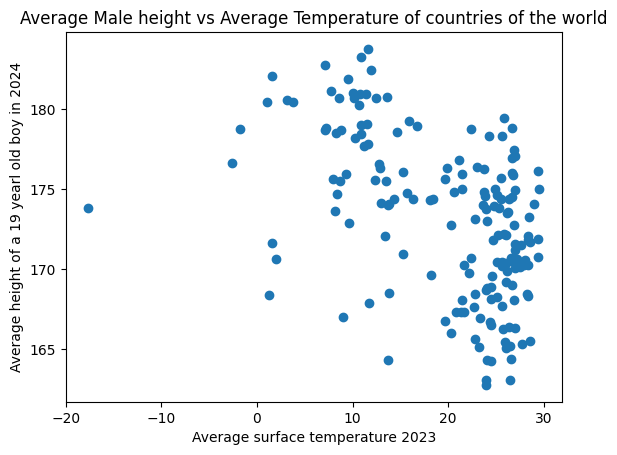

In [18]:
plt.scatter(temp23_vs_height24_ds['Average surface temperature'], temp23_vs_height24_ds['AvgHgtBoysAge19'])
plt.xlabel('Average surface temperature 2023')
plt.ylabel('Average height of a 19 yearl old boy in 2024')
plt.title('Average Male height vs Average Temperature of countries of the world')
plt.show()

In [19]:
temp23_vs_height24_ds['normalized_temp'] = (temp23_vs_height24_ds['Average surface temperature'] - 14).abs()

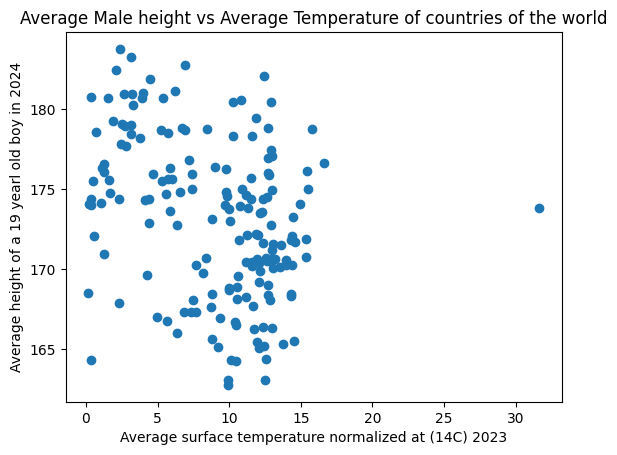

In [20]:
plt.scatter(temp23_vs_height24_ds['normalized_temp'], temp23_vs_height24_ds['AvgHgtBoysAge19'])
plt.xlabel('Average surface temperature normalized at (14C) 2023')
plt.ylabel('Average height of a 19 yearl old boy in 2024')
plt.title('Average Male height vs Average Temperature of countries of the world')
plt.show()

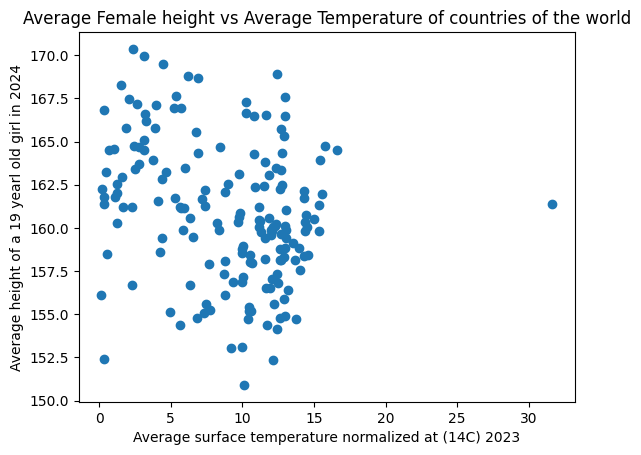

In [21]:
plt.scatter(temp23_vs_height24_ds['normalized_temp'], temp23_vs_height24_ds['AvgHgtGirlsAge19'])
plt.xlabel('Average surface temperature normalized at (14C) 2023')
plt.ylabel('Average height of a 19 yearl old girl in 2024')
plt.title('Average Female height vs Average Temperature of countries of the world')
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [23]:
model_ds = temp23_vs_height24_ds.dropna()

X_male = model_ds['Average surface temperature']
Y = model_ds['AvgHgtBoysAge19']

X_male_const = sm.add_constant(X_male)

model_male = sm.OLS(Y, X_male_const).fit()

print(model_male.summary())



                            OLS Regression Results                            
Dep. Variable:        AvgHgtBoysAge19   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     54.40
Date:                Mon, 23 Dec 2024   Prob (F-statistic):           6.87e-12
Time:                        01:43:15   Log-Likelihood:                -495.14
No. Observations:                 172   AIC:                             994.3
Df Residuals:                     170   BIC:                             1001.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [24]:
X = model_ds['normalized_temp']
Y = model_ds['AvgHgtGirlsAge19']

X = sm.add_constant(X)

model_female = sm.OLS(Y, X).fit()

print(model_female.summary())

                            OLS Regression Results                            
Dep. Variable:       AvgHgtGirlsAge19   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     12.93
Date:                Mon, 23 Dec 2024   Prob (F-statistic):           0.000424
Time:                        01:43:15   Log-Likelihood:                -477.59
No. Observations:                 172   AIC:                             959.2
Df Residuals:                     170   BIC:                             965.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             162.8657      0.632    2

In [25]:
r_squared = model_male.rsquared
p_value = model_male.pvalues['Average surface temperature']
print(r_squared, p_value)

0.24242862369385043 6.8742118680765115e-12


In [26]:
pip install pycountry-convert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 15.3 MB/s eta 0:00:00


In [27]:
import pycountry_convert as pc
from matplotlib.lines import Line2D

In [28]:
def country_to_continent(country_name):
    try:
        # Get alpha-2 country code
        country_code = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        # Convert to continent name
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return 'Unknown'

# Example
print(country_to_continent('India'))  # Output: Asia
print(country_to_continent('Germany'))  # Output: Europe

Asia
Europe


In [29]:
temp23_vs_height24_ds['continent'] = temp23_vs_height24_ds['country'].apply(country_to_continent)
temp23_vs_height24_ds.head(5)

,country,AverageHeightBoysAge19,AverageHeightGirlsAge19,AvgHgtBoysAge19,AvgHgtGirlsAge19,AverageHeightBoysAge15,AverageHeightGirlsAge15,AverageHeightBoysAge10,AverageHeightGirlsAge10,AverageHeightBoysAge5,AverageHeightGirlsAge5,Average surface temperature,normalized_temp,continent
0,Afghanistan,168.50,156.11,168.50,156.11,161.75,151.22,132.95,130.38,106.17,103.59,13.836378,0.163622,Asia
1,Albania,174.07,162.23,174.07,162.23,169.54,160.75,142.06,141.33,117.20,115.70,13.822665,0.177335,Europe
2,Algeria,175.04,162.35,175.04,162.35,166.34,160.36,137.29,140.46,110.52,112.61,24.873967,10.873967,Africa
3,American Samoa,177.09,167.55,177.09,167.55,171.42,164.77,142.72,144.53,115.78,116.06,27.005758,13.005758,Oceania
4,Andorra,178.84,165.53,178.84,165.53,172.09,162.92,143.11,142.86,116.30,114.35,7.266988,6.733012,Europe


In [30]:
# Define a color mapping for each continent
continent_colors = {
    'Asia': 'red',
    'Europe': 'blue',
    'Africa': 'green',
    'North America': 'orange',
    'South America': 'purple',
    'Oceania': 'cyan',
    'Unknown': 'gray'
}

# Map continent column to colors
colors = temp23_vs_height24_ds['continent'].map(continent_colors)

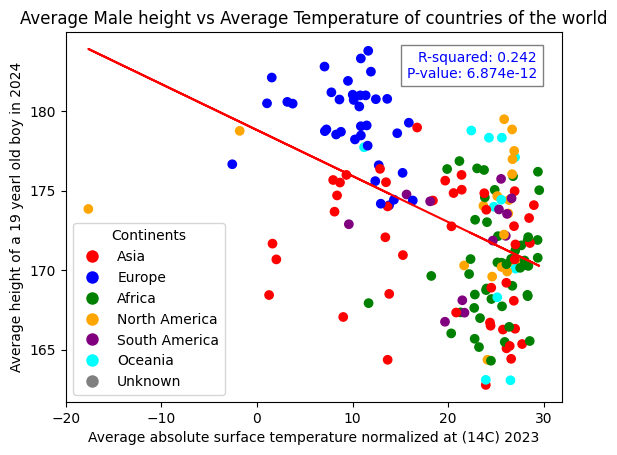

In [31]:
plt.scatter(temp23_vs_height24_ds['Average surface temperature'], temp23_vs_height24_ds['AvgHgtBoysAge19'], c=colors)
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=col, markersize=10, label=cont)
                   for cont, col in continent_colors.items()]
plt.legend(handles=legend_elements, title="Continents", loc="lower left")
plt.plot(X_male, model_male.predict(X_male_const), color='red', label='Fitted Line')
plt.text(0.95, 0.95,
         f'R-squared: {r_squared:.3f}\nP-value: {p_value:.3e}',
         fontsize=10, color='blue',
         bbox=dict(facecolor='white', alpha=0.5),
         ha='right', va='top', transform=plt.gca().transAxes)
plt.xlabel('Average absolute surface temperature normalized at (14C) 2023')
plt.ylabel('Average height of a 19 yearl old boy in 2024')
plt.title('Average Male height vs Average Temperature of countries of the world')
plt.show()

In [32]:
temp23_vs_height24_ds.to_csv('/content/drive/MyDrive/Data Projects/Height vs Weather/Average_Temperature2023_vs_Average_Height2024.csv')


In [33]:
temperature_ds.head(5)

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1
0,Afghanistan,AFG,1940,1940-01-15,-2.032494,11.327695
1,Afghanistan,AFG,1940,1940-02-15,-0.733503,11.327695
2,Afghanistan,AFG,1940,1940-03-15,1.999134,11.327695
3,Afghanistan,AFG,1940,1940-04-15,10.199754,11.327695
4,Afghanistan,AFG,1940,1940-05-15,17.942135,11.327695


In [34]:
temperature_ds['date'] = pd.to_datetime(temperature_ds['Day'], format='%Y-%m-%d')
temperature_ds['month'] = temperature_ds['date'].dt.month
temperature_ds['day'] = temperature_ds['date'].dt.day

In [35]:
temperature_ds.head(5)

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1,date,month,day
0,Afghanistan,AFG,1940,1940-01-15,-2.032494,11.327695,1940-01-15,1,15
1,Afghanistan,AFG,1940,1940-02-15,-0.733503,11.327695,1940-02-15,2,15
2,Afghanistan,AFG,1940,1940-03-15,1.999134,11.327695,1940-03-15,3,15
3,Afghanistan,AFG,1940,1940-04-15,10.199754,11.327695,1940-04-15,4,15
4,Afghanistan,AFG,1940,1940-05-15,17.942135,11.327695,1940-05-15,5,15


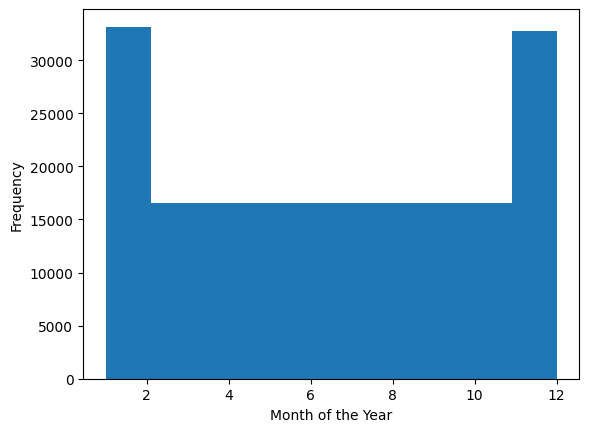

In [36]:
plt.hist(temperature_ds['month'])
plt.xlabel('Month of the Year')
plt.ylabel('Frequency')
plt.show()

In [37]:
temp_by_month = temperature_ds.groupby(['Entity', 'month'])['Average surface temperature'].mean().reset_index()

temperature_ds = temperature_ds.merge(temp_by_month, on=['Entity', 'month'], suffixes=('', '_avg'))

temperature_ds['avg_surface_temp_month'] = temperature_ds['Average surface temperature_avg']

temperature_ds.drop(columns=['Average surface temperature_avg'], inplace=True)

In [38]:
temperature_ds.head(5)

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1,date,month,day,avg_surface_temp_month
0,Afghanistan,AFG,1940,1940-01-15,-2.032494,11.327695,1940-01-15,1,15,-1.896828
1,Afghanistan,AFG,1940,1940-02-15,-0.733503,11.327695,1940-02-15,2,15,0.348513
2,Afghanistan,AFG,1940,1940-03-15,1.999134,11.327695,1940-03-15,3,15,5.963915
3,Afghanistan,AFG,1940,1940-04-15,10.199754,11.327695,1940-04-15,4,15,12.520753
4,Afghanistan,AFG,1940,1940-05-15,17.942135,11.327695,1940-05-15,5,15,18.270178


In [39]:
temperature_ds.describe()

,year,Average surface temperature,Average surface temperature.1,date,month,day,avg_surface_temp_month
count,198510.000000,198510.000000,198510.000000,198510,198510.000000,198510.0,198510.000000
mean,1981.917485,18.075807,18.075807,1982-05-31 03:32:10.844793664,6.490177,15.0,18.075807
min,1940.000000,-36.240032,-21.529121,1940-01-15 00:00:00,1.000000,15.0,-28.343291
25%,1961.000000,12.313821,10.572247,1961-03-15 00:00:00,3.000000,15.0,12.355707
50%,1982.000000,22.056837,21.861132,1982-05-30 12:00:00,6.000000,15.0,22.115148
75%,2003.000000,25.315705,25.142963,2003-08-15 00:00:00,9.000000,15.0,25.273167
max,2024.000000,39.889374,30.746365,2024-10-15 00:00:00,12.000000,15.0,37.373582
std,24.489045,10.243696,8.708166,NaN,3.448251,0.0,10.166599


In [40]:
tempMonth_vs_height24_ds = temp_by_month.merge(temp23_vs_height24_ds, left_on = 'Entity', right_on = 'country', how = 'left', suffixes=('_month', ''))

In [41]:
tempMonth_vs_height24_ds.head(5)

,Entity,month,Average surface temperature_month,country,AverageHeightBoysAge19,AverageHeightGirlsAge19,AvgHgtBoysAge19,AvgHgtGirlsAge19,AverageHeightBoysAge15,AverageHeightGirlsAge15,AverageHeightBoysAge10,AverageHeightGirlsAge10,AverageHeightBoysAge5,AverageHeightGirlsAge5,Average surface temperature,normalized_temp,continent
0,Afghanistan,1,-1.896828,Afghanistan,168.5,156.11,168.5,156.11,161.75,151.22,132.95,130.38,106.17,103.59,13.836378,0.163622,Asia
1,Afghanistan,2,0.348513,Afghanistan,168.5,156.11,168.5,156.11,161.75,151.22,132.95,130.38,106.17,103.59,13.836378,0.163622,Asia
2,Afghanistan,3,5.963915,Afghanistan,168.5,156.11,168.5,156.11,161.75,151.22,132.95,130.38,106.17,103.59,13.836378,0.163622,Asia
3,Afghanistan,4,12.520753,Afghanistan,168.5,156.11,168.5,156.11,161.75,151.22,132.95,130.38,106.17,103.59,13.836378,0.163622,Asia
4,Afghanistan,5,18.270178,Afghanistan,168.5,156.11,168.5,156.11,161.75,151.22,132.95,130.38,106.17,103.59,13.836378,0.163622,Asia


In [42]:
def label_season(month):
    if month in [10, 11, 12, 1, 2, 3]:
        return 'Winter'
    elif month in [4, 5, 6, 7, 8, 9]:
        return 'Summer'
    else:
        return 'Unknown'

tempMonth_vs_height24_ds['season'] = tempMonth_vs_height24_ds['month'].apply(label_season)

In [43]:
tempMonth_vs_height24_ds.head(5)

,Entity,month,Average surface temperature_month,country,AverageHeightBoysAge19,AverageHeightGirlsAge19,AvgHgtBoysAge19,AvgHgtGirlsAge19,AverageHeightBoysAge15,AverageHeightGirlsAge15,AverageHeightBoysAge10,AverageHeightGirlsAge10,AverageHeightBoysAge5,AverageHeightGirlsAge5,Average surface temperature,normalized_temp,continent,season
0,Afghanistan,1,-1.896828,Afghanistan,168.5,156.11,168.5,156.11,161.75,151.22,132.95,130.38,106.17,103.59,13.836378,0.163622,Asia,Winter
1,Afghanistan,2,0.348513,Afghanistan,168.5,156.11,168.5,156.11,161.75,151.22,132.95,130.38,106.17,103.59,13.836378,0.163622,Asia,Winter
2,Afghanistan,3,5.963915,Afghanistan,168.5,156.11,168.5,156.11,161.75,151.22,132.95,130.38,106.17,103.59,13.836378,0.163622,Asia,Winter
3,Afghanistan,4,12.520753,Afghanistan,168.5,156.11,168.5,156.11,161.75,151.22,132.95,130.38,106.17,103.59,13.836378,0.163622,Asia,Summer
4,Afghanistan,5,18.270178,Afghanistan,168.5,156.11,168.5,156.11,161.75,151.22,132.95,130.38,106.17,103.59,13.836378,0.163622,Asia,Summer


In [44]:
temp_by_season = tempMonth_vs_height24_ds.groupby(['Entity', 'season'])['Average surface temperature_month'].mean().reset_index()

In [45]:
temp_by_season.head(5)

,Entity,season,Average surface temperature_month
0,Afghanistan,Summer,20.145231
1,Afghanistan,Winter,3.972032
2,Albania,Summer,17.947667
3,Albania,Winter,6.653617
4,Algeria,Summer,29.685865


In [46]:
temp_winter = temp_by_season[temp_by_season['season']=='Winter']
temp_winter.columns = ['country', 'season', 'temp_winter']
temp_winter.head(3)

,country,season,temp_winter
1,Afghanistan,Winter,3.972032
3,Albania,Winter,6.653617
5,Algeria,Winter,16.203065


In [47]:
temp_summer = temp_by_season[temp_by_season['season']=='Summer']
temp_summer.columns = ['country', 'season', 'temp_summer']
temp_summer.head(3)

,country,season,temp_summer
0,Afghanistan,Summer,20.145231
2,Albania,Summer,17.947667
4,Algeria,Summer,29.685865


In [48]:
temp_by_season = temp_by_season.to_frame() if isinstance(temp_by_season, pd.Series) else temp_by_season
tempMonth_vs_height24_ds = tempMonth_vs_height24_ds.to_frame() if isinstance(tempMonth_vs_height24_ds, pd.Series) else tempMonth_vs_height24_ds

In [49]:
tempSeason_vs_height24_ds = temp_by_season.merge(tempMonth_vs_height24_ds, on = ['Entity', 'season'], how = 'left', suffixes=('_season', ''))

In [50]:
tempSeason_vs_height24_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    2340 non-null   object 
 1   season                                    2340 non-null   object 
 2   Average surface temperature_month_season  2340 non-null   float64
 3   month                                     2340 non-null   int32  
 4   Average surface temperature_month         2340 non-null   float64
 5   country                                   2064 non-null   object 
 6   AverageHeightBoysAge19                    2064 non-null   float64
 7   AverageHeightGirlsAge19                   2064 non-null   float64
 8   AvgHgtBoysAge19                           2064 non-null   float64
 9   AvgHgtGirlsAge19                          2064 non-null   float64
 10  AverageHeightBoysAge15              

In [51]:
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Convert numeric months to categorical labels
tempSeason_vs_height24_ds['month_categorical'] = tempSeason_vs_height24_ds['month'].replace(month_mapping)

# Display the updated DataFrame
print(tempSeason_vs_height24_ds[['month', 'month_categorical']].head())


   month month_categorical
0      4             April
1      5               May
2      6              June
3      7              July
4      8            August


In [52]:
tempSeason_vs_height24_ds.to_csv('/content/drive/MyDrive/Data Projects/Height vs Weather/Average_Temperature_month_season_year2023_vs_Average_Height2024.csv')


In [53]:
tempSeason_vs_height24_ds.describe(include='all')

,Entity,season,Average surface temperature_month_season,month,Average surface temperature_month,country,AverageHeightBoysAge19,AverageHeightGirlsAge19,AvgHgtBoysAge19,AvgHgtGirlsAge19,AverageHeightBoysAge15,AverageHeightGirlsAge15,AverageHeightBoysAge10,AverageHeightGirlsAge10,AverageHeightBoysAge5,AverageHeightGirlsAge5,Average surface temperature,normalized_temp,continent,month_categorical
count,2340,2340,2340.000000,2340.00000,2340.000000,2064,2064.00000,2064.000000,2064.00000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064,2340
unique,195,2,NaN,NaN,NaN,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,12
top,Afghanistan,Summer,NaN,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,April
freq,12,1170,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,576,195
mean,NaN,NaN,18.069801,6.50000,18.069801,NaN,173.13564,160.862907,173.13564,160.862907,166.991860,159.001919,138.354012,139.269884,111.699012,111.130523,19.596672,8.918212,NaN,NaN
std,NaN,NaN,9.787070,3.45279,10.172203,NaN,4.94722,4.033541,4.94722,4.033541,5.265512,4.009009,5.114307,3.971451,5.078640,3.703285,8.428308,4.775065,NaN,NaN
min,NaN,NaN,-26.092707,1.00000,-28.343291,NaN,162.78000,150.910000,162.78000,150.910000,154.640000,149.520000,123.810000,127.450000,96.060000,102.300000,-17.644807,0.163622,NaN,NaN
25%,NaN,NaN,12.877071,3.75000,12.348406,NaN,169.49250,158.135000,169.49250,158.135000,162.467500,155.992500,133.890000,136.030000,107.167500,108.032500,12.842758,5.287117,NaN,NaN
50%,NaN,NaN,21.929023,6.50000,22.113801,NaN,173.61500,160.560000,173.61500,160.560000,167.195000,158.985000,138.865000,139.310000,112.460000,111.240000,23.285348,10.043083,NaN,NaN
75%,NaN,NaN,25.239328,9.25000,25.254327,NaN,176.44000,163.512500,176.44000,163.512500,171.222500,162.030000,142.892500,142.822500,115.615000,113.592500,26.206365,12.541947,NaN,NaN


In [54]:
model_ds = tempSeason_vs_height24_ds.dropna()
model_ds = model_ds[model_ds['season'] == 'Winter']

In [55]:
X = model_ds['Average surface temperature_month_season']
Y = model_ds['AvgHgtBoysAge19']

X = sm.add_constant(X)

model_winter = sm.OLS(Y, X).fit()

print(model_winter.summary())

                            OLS Regression Results                            
Dep. Variable:        AvgHgtBoysAge19   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     383.6
Date:                Mon, 23 Dec 2024   Prob (F-statistic):           7.52e-73
Time:                        01:43:27   Log-Likelihood:                -2950.7
No. Observations:                1032   AIC:                             5905.
Df Residuals:                    1030   BIC:                             5915.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [56]:
model_ds = tempSeason_vs_height24_ds.dropna()
model_ds = model_ds[model_ds['season'] == 'Summer']

In [57]:
X = model_ds['Average surface temperature_month_season']
Y = model_ds['AvgHgtBoysAge19']

X = sm.add_constant(X)

model_summer = sm.OLS(Y, X).fit()

print(model_summer.summary())

                            OLS Regression Results                            
Dep. Variable:        AvgHgtBoysAge19   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     190.6
Date:                Mon, 23 Dec 2024   Prob (F-statistic):           6.56e-40
Time:                        01:43:27   Log-Likelihood:                -3026.5
No. Observations:                1032   AIC:                             6057.
Df Residuals:                    1030   BIC:                             6067.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [58]:
meat_ds = pd.read_csv('/content/drive/MyDrive/Data Projects/Height vs Weather/meat-supply-per-person.csv')

In [59]:
meat_ds.head(5)

,Entity,Code,Year,"Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita"
0,Afghanistan,AFG,1961,14.719367
1,Afghanistan,AFG,1962,14.738824
2,Afghanistan,AFG,1963,15.176605
3,Afghanistan,AFG,1964,15.378455
4,Afghanistan,AFG,1965,15.701337


In [60]:
meat_ds.describe(include = 'all')

,Entity,Code,Year,"Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita"
count,12592,9973,12592.000000,12592.000000
unique,238,194,NaN,NaN
top,Afghanistan,AFG,NaN,NaN
freq,61,61,NaN,NaN
mean,NaN,NaN,1992.001191,41.419030
std,NaN,NaN,17.657583,30.955215
min,NaN,NaN,1961.000000,2.279999
25%,NaN,NaN,1977.000000,14.431767
50%,NaN,NaN,1993.000000,32.455557
75%,NaN,NaN,2007.000000,65.675785


In [61]:
meat_ds.columns= ['Entity', 'Code', 'Year', 'meat_kg_per_capita']

In [62]:
meat_avg_1961_2021_per_capita = meat_ds.groupby('Entity')['meat_kg_per_capita'].mean()

In [63]:
meat_avg_1961_2021_per_capita.head(5)

,meat_kg_per_capita
Entity,
Afghanistan,16.222499
Africa,14.863519
Africa (FAO),15.176721
Albania,26.482539
Algeria,15.498477


In [64]:
meat_vs_height = height_ds.merge(meat_avg_1961_2021_per_capita, left_on = 'country', right_on = 'Entity', how='left')

In [65]:
meat_vs_height.head(5)

,country,AverageHeightBoysAge19,AverageHeightGirlsAge19,AvgHgtBoysAge19,AvgHgtGirlsAge19,AverageHeightBoysAge15,AverageHeightGirlsAge15,AverageHeightBoysAge10,AverageHeightGirlsAge10,AverageHeightBoysAge5,AverageHeightGirlsAge5,meat_kg_per_capita
0,India,166.50,155.18,166.50,155.18,159.01,152.39,132.57,132.85,107.07,107.19,4.014139
1,China,175.66,163.46,175.66,163.46,171.23,162.44,141.87,143.40,113.41,114.91,30.824999
2,Indonesia,166.26,154.36,166.26,154.36,160.52,153.02,132.30,133.46,107.83,107.55,7.956240
3,Pakistan,167.33,154.77,167.33,154.77,161.13,152.45,133.97,133.03,108.11,105.45,11.236779
4,Nigeria,171.55,158.14,171.55,158.14,160.12,154.20,133.01,132.85,109.79,107.59,8.173872


In [66]:
meat_vs_height.describe(include='all')

,country,AverageHeightBoysAge19,AverageHeightGirlsAge19,AvgHgtBoysAge19,AvgHgtGirlsAge19,AverageHeightBoysAge15,AverageHeightGirlsAge15,AverageHeightBoysAge10,AverageHeightGirlsAge10,AverageHeightBoysAge5,AverageHeightGirlsAge5,meat_kg_per_capita
count,196,196.000000,196.000000,195.000000,195.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,173.000000
unique,196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,173.111119,160.962586,173.120051,160.971897,167.093862,159.122600,138.523067,139.419614,111.923352,111.289473,41.872383
std,NaN,4.960571,4.101821,4.971759,4.110302,5.267223,4.059628,5.147848,4.018988,5.133235,3.761384,27.984026
min,NaN,160.130000,150.910000,160.130000,150.910000,154.150000,149.520000,123.810000,127.450000,96.060000,102.300000,2.833333
25%,NaN,169.570000,158.177500,169.570000,158.165000,162.595000,156.140000,133.960000,136.197500,107.717500,108.080000,17.360727
50%,NaN,173.545000,160.660000,173.560000,160.700000,167.375000,159.115000,139.095000,139.390000,112.610000,111.375000,36.534053
75%,NaN,176.470000,163.925000,176.510000,163.930000,171.242500,162.342500,142.892500,142.852500,115.715000,113.905000,61.853321


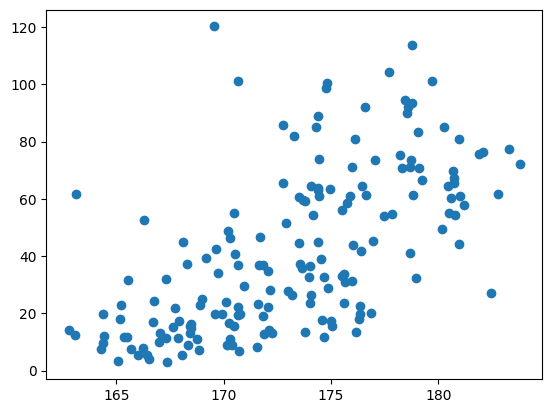

In [67]:
plt.scatter(meat_vs_height['AvgHgtBoysAge19'], meat_vs_height['meat_kg_per_capita'])
plt.show()

In [68]:
model_ds = meat_vs_height.dropna()

In [69]:
X = model_ds['AvgHgtBoysAge19']
Y = model_ds['meat_kg_per_capita']

X = sm.add_constant(X)

model_meat = sm.OLS(Y, X).fit()

print(model_meat.summary())

                            OLS Regression Results                            
Dep. Variable:     meat_kg_per_capita   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     107.9
Date:                Mon, 23 Dec 2024   Prob (F-statistic):           6.65e-20
Time:                        01:43:29   Log-Likelihood:                -779.03
No. Observations:                 173   AIC:                             1562.
Df Residuals:                     171   BIC:                             1568.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -564.8118     58.430     

In [70]:
avg_temp_1940_2024 = temperature_ds.groupby('Entity')['Average surface temperature'].mean()

In [71]:
avg_temp_1940_2024.head(3)

,Average surface temperature
Entity,
Afghanistan,12.075806
Albania,12.312128
Algeria,22.960601


In [72]:
meat_vs_height_vs_temp = meat_vs_height.merge(avg_temp_1940_2024, left_on = 'country', right_on = 'Entity', how='left')

In [73]:
meat_vs_height_vs_temp.head(3)

,country,AverageHeightBoysAge19,AverageHeightGirlsAge19,AvgHgtBoysAge19,AvgHgtGirlsAge19,AverageHeightBoysAge15,AverageHeightGirlsAge15,AverageHeightBoysAge10,AverageHeightGirlsAge10,AverageHeightBoysAge5,AverageHeightGirlsAge5,meat_kg_per_capita,Average surface temperature
0,India,166.50,155.18,166.50,155.18,159.01,152.39,132.57,132.85,107.07,107.19,4.014139,23.878506
1,China,175.66,163.46,175.66,163.46,171.23,162.44,141.87,143.40,113.41,114.91,30.824999,6.740662
2,Indonesia,166.26,154.36,166.26,154.36,160.52,153.02,132.30,133.46,107.83,107.55,7.956240,24.604596


In [74]:
temp_winter.drop(columns=['season'], inplace=True)
temp_summer.drop(columns=['season'], inplace=True)

<ipython-input-74-4fc8e0a1479c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_winter.drop(columns=['season'], inplace=True)
<ipython-input-74-4fc8e0a1479c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_summer.drop(columns=['season'], inplace=True)


In [75]:
meat_vs_height_vs_tempWinter = meat_vs_height_vs_temp.merge(temp_winter, on = 'country', how='left')
meat_vs_height_vs_tempWinterSummer = meat_vs_height_vs_tempWinter.merge(temp_summer, on = 'country', how = 'left')

In [76]:
meat_vs_height_vs_tempWinterSummer.head(3)

,country,AverageHeightBoysAge19,AverageHeightGirlsAge19,AvgHgtBoysAge19,AvgHgtGirlsAge19,AverageHeightBoysAge15,AverageHeightGirlsAge15,AverageHeightBoysAge10,AverageHeightGirlsAge10,AverageHeightBoysAge5,AverageHeightGirlsAge5,meat_kg_per_capita,Average surface temperature,temp_winter,temp_summer
0,India,166.50,155.18,166.50,155.18,159.01,152.39,132.57,132.85,107.07,107.19,4.014139,23.878506,20.390241,27.347545
1,China,175.66,163.46,175.66,163.46,171.23,162.44,141.87,143.40,113.41,114.91,30.824999,6.740662,-1.826974,15.268593
2,Indonesia,166.26,154.36,166.26,154.36,160.52,153.02,132.30,133.46,107.83,107.55,7.956240,24.604596,24.612968,24.596283


In [77]:
crop_ds = pd.read_csv('/content/drive/MyDrive/Data Projects/Height vs Weather/cereal-yield.csv')

In [78]:
crop_ds.head(3)

,Entity,Code,Year,Cereals | 00001717 || Yield | 005419 || tonnes per hectare
0,Afghanistan,AFG,1961,1.1151
1,Afghanistan,AFG,1962,1.0790
2,Afghanistan,AFG,1963,0.9858


In [79]:
crop_ds.columns=['country', 'Code', 'Year', 'cereals_tonnes_per_hectare']

In [80]:
crop_ds.describe(include='all')

,country,Code,Year,cereals_tonnes_per_hectare
count,13040,10437,13040.000000,13040.000000
unique,236,192,NaN,NaN
top,Afghanistan,AFG,NaN,NaN
freq,62,62,NaN,NaN
mean,NaN,NaN,1992.499463,2.546842
std,NaN,NaN,17.862493,2.146578
min,NaN,NaN,1961.000000,0.000100
25%,NaN,NaN,1977.000000,1.194200
50%,NaN,NaN,1993.000000,1.944950
75%,NaN,NaN,2008.000000,3.393675


In [81]:
crop_yield_1961_2022 = crop_ds.groupby('country')['cereals_tonnes_per_hectare'].mean().reset_index()
crop_yield_1961_2022.head(3)

,country,cereals_tonnes_per_hectare
0,Afghanistan,1.451526
1,Africa,1.267508
2,Africa (FAO),1.229766


In [82]:
crop_yield_1961_2022.describe(include='all')

,country,cereals_tonnes_per_hectare
count,236,236.000000
unique,236,NaN
top,Afghanistan,NaN
freq,1,NaN
mean,NaN,2.603850
std,NaN,1.726391
min,NaN,0.342281
25%,NaN,1.336804
50%,NaN,2.223294
75%,NaN,3.280099


In [83]:
height_meat_tempWinterSummer_crop = meat_vs_height_vs_tempWinterSummer.merge(crop_yield_1961_2022, on = 'country', how = 'left')
height_meat_tempWinterSummer_crop.head(3)

,country,AverageHeightBoysAge19,AverageHeightGirlsAge19,AvgHgtBoysAge19,AvgHgtGirlsAge19,AverageHeightBoysAge15,AverageHeightGirlsAge15,AverageHeightBoysAge10,AverageHeightGirlsAge10,AverageHeightBoysAge5,AverageHeightGirlsAge5,meat_kg_per_capita,Average surface temperature,temp_winter,temp_summer,cereals_tonnes_per_hectare
0,India,166.50,155.18,166.50,155.18,159.01,152.39,132.57,132.85,107.07,107.19,4.014139,23.878506,20.390241,27.347545,1.972719
1,China,175.66,163.46,175.66,163.46,171.23,162.44,141.87,143.40,113.41,114.91,30.824999,6.740662,-1.826974,15.268593,4.066310
2,Indonesia,166.26,154.36,166.26,154.36,160.52,153.02,132.30,133.46,107.83,107.55,7.956240,24.604596,24.612968,24.596283,3.556339


In [84]:
height_meat_tempWinterSummer_crop.describe(include='all')

,country,AverageHeightBoysAge19,AverageHeightGirlsAge19,AvgHgtBoysAge19,AvgHgtGirlsAge19,AverageHeightBoysAge15,AverageHeightGirlsAge15,AverageHeightBoysAge10,AverageHeightGirlsAge10,AverageHeightBoysAge5,AverageHeightGirlsAge5,meat_kg_per_capita,Average surface temperature,temp_winter,temp_summer,cereals_tonnes_per_hectare
count,196,196.000000,196.000000,195.000000,195.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,173.000000,172.000000,172.000000,172.000000,169.000000
unique,196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,173.111119,160.962586,173.120051,160.971897,167.093862,159.122600,138.523067,139.419614,111.923352,111.289473,41.872383,18.240029,15.360619,21.106681,2.644688
std,NaN,4.960571,4.101821,4.971759,4.110302,5.267223,4.059628,5.147848,4.018988,5.133235,3.761384,27.984026,8.660527,11.346094,6.954026,1.851678
min,NaN,160.130000,150.910000,160.130000,150.910000,154.150000,149.520000,123.810000,127.450000,96.060000,102.300000,2.833333,-18.867853,-26.092707,-11.671150,0.342281
25%,NaN,169.570000,158.177500,169.570000,158.165000,162.595000,156.140000,133.960000,136.197500,107.717500,108.080000,17.360727,10.949187,5.031821,17.296727,1.333739
50%,NaN,173.545000,160.660000,173.560000,160.700000,167.375000,159.115000,139.095000,139.390000,112.610000,111.375000,36.534053,22.223402,21.144351,23.161818,2.261376
75%,NaN,176.470000,163.925000,176.510000,163.930000,171.242500,162.342500,142.892500,142.852500,115.715000,113.905000,61.853321,25.080245,24.633802,26.046048,3.278529


In [85]:
height_meat_tempWinterSummer_crop['normalized_temp'] = (height_meat_tempWinterSummer_crop['Average surface temperature'] - 14).abs()

In [86]:
height_meat_tempWinterSummer_crop.count()

,0
country,196
AverageHeightBoysAge19,196
AverageHeightGirlsAge19,196
AvgHgtBoysAge19,195
AvgHgtGirlsAge19,195
AverageHeightBoysAge15,196
AverageHeightGirlsAge15,196
AverageHeightBoysAge10,196
AverageHeightGirlsAge10,196
AverageHeightBoysAge5,196


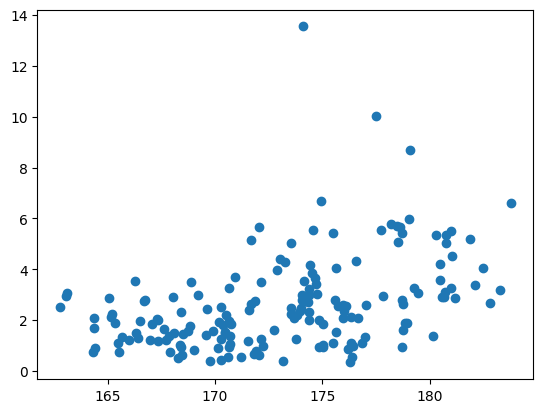

In [87]:
plt.scatter(height_meat_tempWinterSummer_crop['AvgHgtBoysAge19'], height_meat_tempWinterSummer_crop['cereals_tonnes_per_hectare'])
plt.show()

In [88]:
model_ds = height_meat_tempWinterSummer_crop.dropna()

In [89]:
X = model_ds['AvgHgtBoysAge19']
Y = model_ds['cereals_tonnes_per_hectare']

X = sm.add_constant(X)

model_crop = sm.OLS(Y, X).fit()

print(model_crop.summary())

                                OLS Regression Results                                
Dep. Variable:     cereals_tonnes_per_hectare   R-squared:                       0.193
Model:                                    OLS   Adj. R-squared:                  0.188
Method:                         Least Squares   F-statistic:                     37.29
Date:                        Mon, 23 Dec 2024   Prob (F-statistic):           7.77e-09
Time:                                01:43:32   Log-Likelihood:                -305.98
No. Observations:                         158   AIC:                             616.0
Df Residuals:                             156   BIC:                             622.1
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [90]:
import seaborn as sns




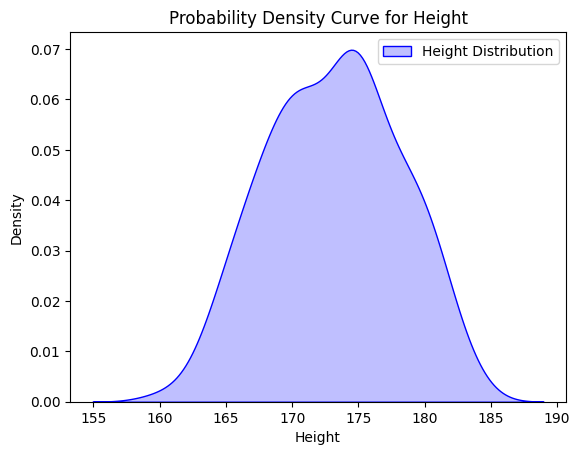

In [91]:
sns.kdeplot(height_meat_tempWinterSummer_crop['AvgHgtBoysAge19'], fill=True, color="blue", label="Height Distribution")

# Add labels and title
plt.xlabel('Height')
plt.ylabel('Density')
plt.title('Probability Density Curve for Height')
plt.legend()

# Show the plot
plt.show()

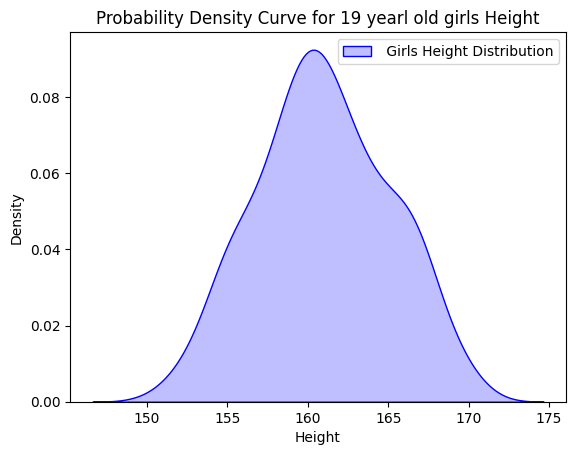

In [92]:
sns.kdeplot(height_meat_tempWinterSummer_crop['AvgHgtGirlsAge19'], fill=True, color="blue", label=" Girls Height Distribution")

# Add labels and title
plt.xlabel('Height')
plt.ylabel('Density')
plt.title('Probability Density Curve for 19 yearl old girls Height')
plt.legend()

# Show the plot
plt.show()

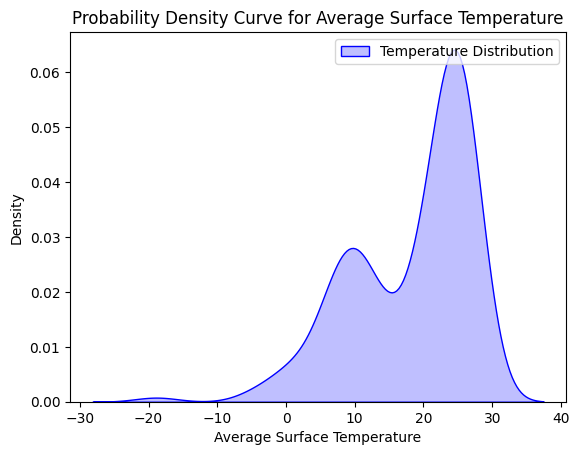

In [93]:
sns.kdeplot(height_meat_tempWinterSummer_crop['Average surface temperature'], fill=True, color="blue", label="Temperature Distribution")

# Add labels and title
plt.xlabel('Average Surface Temperature')
plt.ylabel('Density')
plt.title('Probability Density Curve for Average Surface Temperature')
plt.legend()

# Show the plot
plt.show()

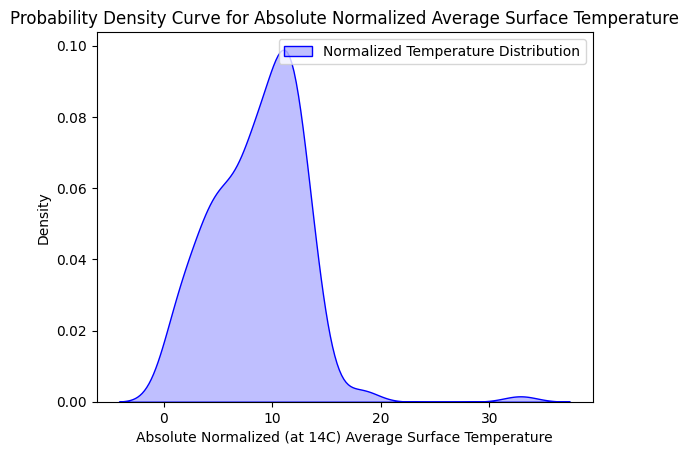

In [94]:
sns.kdeplot(height_meat_tempWinterSummer_crop['normalized_temp'], fill=True, color="blue", label="Normalized Temperature Distribution")

# Add labels and title
plt.xlabel('Absolute Normalized (at 14C) Average Surface Temperature')
plt.ylabel('Density')
plt.title('Probability Density Curve for Absolute Normalized Average Surface Temperature')
plt.legend()

# Show the plot
plt.show()

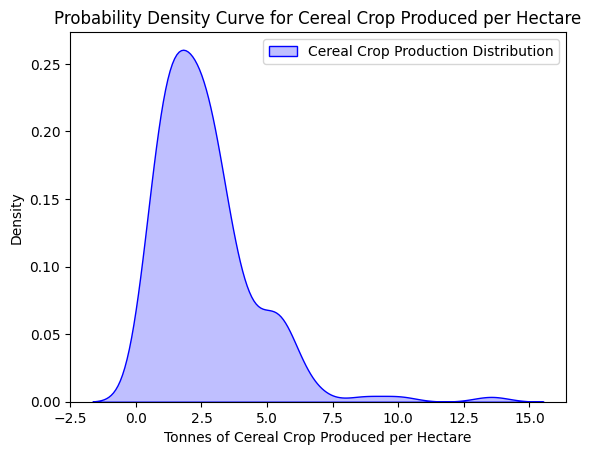

In [95]:
sns.kdeplot(height_meat_tempWinterSummer_crop['cereals_tonnes_per_hectare'], fill=True, color="blue", label="Cereal Crop Production Distribution")

# Add labels and title
plt.xlabel('Tonnes of Cereal Crop Produced per Hectare')
plt.ylabel('Density')
plt.title('Probability Density Curve for Cereal Crop Produced per Hectare')
plt.legend()

# Show the plot
plt.show()

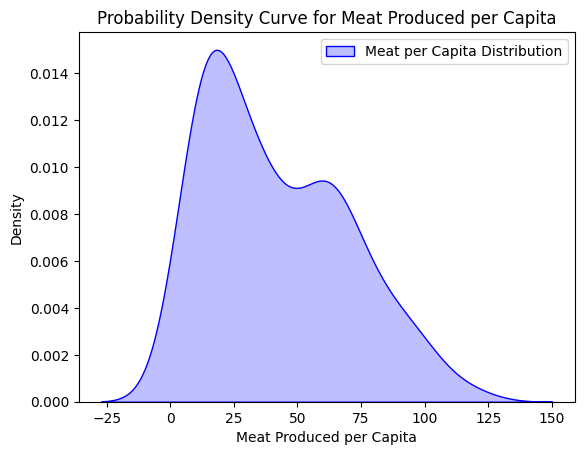

In [96]:
sns.kdeplot(height_meat_tempWinterSummer_crop['meat_kg_per_capita'], fill=True, color="blue", label="Meat per Capita Distribution")

# Add labels and title
plt.xlabel('Meat Produced per Capita')
plt.ylabel('Density')
plt.title('Probability Density Curve for Meat Produced per Capita')
plt.legend()

# Show the plot
plt.show()

In [101]:
gdp_ds = pd.read_csv('/content/drive/MyDrive/Data Projects/Height vs Weather/gdp-per-capita-worldbank.csv')

In [102]:
gdp_ds.columns = ['country', 'Code', 'Year', 'gdp_per_capita']

In [103]:
gdp_ds.head(3)

,country,Code,Year,gdp_per_capita
0,Afghanistan,AFG,2002,1280.4631
1,Afghanistan,AFG,2003,1292.3335
2,Afghanistan,AFG,2004,1260.0605


In [104]:
gdp_ds.describe(include='all')

,country,Code,Year,gdp_per_capita
count,6562,6133,6562.000000,6562.000000
unique,208,195,NaN,NaN
top,Zimbabwe,ZWE,NaN,NaN
freq,33,33,NaN,NaN
mean,NaN,NaN,2006.434014,18307.128922
std,NaN,NaN,9.415812,20344.959620
min,NaN,NaN,1990.000000,430.413540
25%,NaN,NaN,1998.000000,3726.793100
50%,NaN,NaN,2007.000000,10638.246000
75%,NaN,NaN,2015.000000,26873.173500


In [109]:
gdp_1990_2022 = gdp_ds.groupby('country')['gdp_per_capita'].mean().reset_index()

,country,gdp_per_capita
0,Afghanistan,1790.622415
1,Albania,8674.174982
2,Algeria,10058.476755


In [110]:
gdp_1990_2022.columns = ['country', 'gdp_per_capita_mean1990_2022']
gdp_1990_2022.head(3)

,country,gdp_per_capita_mean1990_2022
0,Afghanistan,1790.622415
1,Albania,8674.174982
2,Algeria,10058.476755


In [112]:
height_meat_tempWinterSummer_crop_gdp = height_meat_tempWinterSummer_crop.merge(gdp_1990_2022, on = 'country', how = 'left')
height_meat_tempWinterSummer_crop_gdp.head(3)

,country,AverageHeightBoysAge19,AverageHeightGirlsAge19,AvgHgtBoysAge19,AvgHgtGirlsAge19,AverageHeightBoysAge15,AverageHeightGirlsAge15,AverageHeightBoysAge10,AverageHeightGirlsAge10,AverageHeightBoysAge5,AverageHeightGirlsAge5,meat_kg_per_capita,Average surface temperature,temp_winter,temp_summer,cereals_tonnes_per_hectare,normalized_temp,gdp_per_capita_mean1990_2022
0,India,166.50,155.18,166.50,155.18,159.01,152.39,132.57,132.85,107.07,107.19,4.014139,23.878506,20.390241,27.347545,1.972719,9.878506,3815.900745
1,China,175.66,163.46,175.66,163.46,171.23,162.44,141.87,143.40,113.41,114.91,30.824999,6.740662,-1.826974,15.268593,4.066310,7.259338,7643.373070
2,Indonesia,166.26,154.36,166.26,154.36,160.52,153.02,132.30,133.46,107.83,107.55,7.956240,24.604596,24.612968,24.596283,3.556339,10.604596,7753.425785


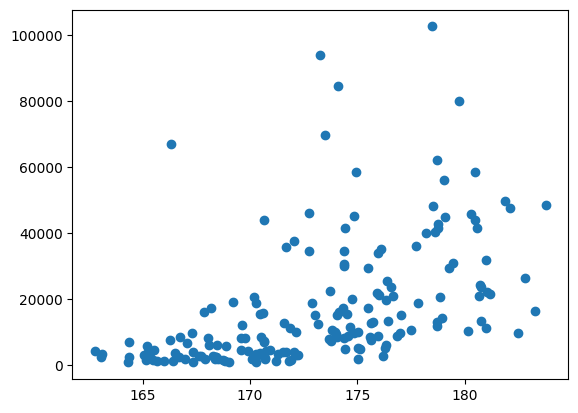

In [114]:
plt.scatter(height_meat_tempWinterSummer_crop_gdp['AvgHgtBoysAge19'], height_meat_tempWinterSummer_crop_gdp['gdp_per_capita_mean1990_2022'])
plt.show()

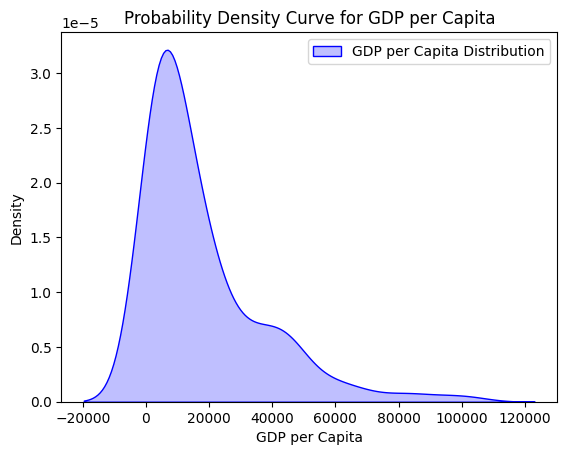

In [113]:
sns.kdeplot(height_meat_tempWinterSummer_crop_gdp['gdp_per_capita_mean1990_2022'], fill=True, color="blue", label="GDP per Capita Distribution")

# Add labels and title
plt.xlabel('GDP per Capita')
plt.ylabel('Density')
plt.title('Probability Density Curve for GDP per Capita')
plt.legend()

# Show the plot
plt.show()

In [115]:
model_ds = height_meat_tempWinterSummer_crop_gdp.dropna()

In [116]:
Y = model_ds['AvgHgtBoysAge19']
X = model_ds['gdp_per_capita_mean1990_2022']

X = sm.add_constant(X)

model_gdp = sm.OLS(Y, X).fit()

print(model_gdp.summary())

                            OLS Regression Results                            
Dep. Variable:        AvgHgtBoysAge19   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     56.81
Date:                Mon, 23 Dec 2024   Prob (F-statistic):           4.02e-12
Time:                        01:59:54   Log-Likelihood:                -443.46
No. Observations:                 154   AIC:                             890.9
Df Residuals:                     152   BIC:                             897.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [121]:
freedom_of_expression_ds = pd.read_csv('/content/drive/MyDrive/Data Projects/Height vs Weather/freedom-of-expression-index.csv')
freedom_of_expression_ds.columns = ['country', 'Code', 'Year', 'freedom_of_expression']

In [122]:
freedom_of_expression_ds.head(3)

,country,Code,Year,freedom_of_expression
0,Afghanistan,AFG,1789,0.073
1,Afghanistan,AFG,1790,0.073
2,Afghanistan,AFG,1791,0.073


In [123]:
freedom_of_expression_ds.describe(include='all')

,country,Code,Year,freedom_of_expression
count,31803,31210,31803.000000,31803.000000
unique,205,195,NaN,NaN
top,Afghanistan,AFG,NaN,NaN
freq,235,235,NaN,NaN
mean,NaN,NaN,1924.146904,0.384073
std,NaN,NaN,64.927947,0.308695
min,NaN,NaN,1789.000000,0.010000
25%,NaN,NaN,1872.000000,0.102000
50%,NaN,NaN,1933.000000,0.275000
75%,NaN,NaN,1979.000000,0.668000


In [127]:
freedom_of_expression_1789_2023 = freedom_of_expression_ds.groupby('country')['freedom_of_expression'].mean().reset_index()
freedom_of_expression_1789_2023.columns = ['country', 'freedom_of_expression_mean1789_2023']
freedom_of_expression_1789_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              205 non-null    object 
 1   freedom_of_expression_mean1789_2023  205 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


In [128]:
height_meat_tempWinterSummer_crop_gdp_freedom = height_meat_tempWinterSummer_crop_gdp.merge(freedom_of_expression_1789_2023, on='country', how='left')
height_meat_tempWinterSummer_crop_gdp_freedom.head(3)

,country,AverageHeightBoysAge19,AverageHeightGirlsAge19,AvgHgtBoysAge19,AvgHgtGirlsAge19,AverageHeightBoysAge15,AverageHeightGirlsAge15,AverageHeightBoysAge10,AverageHeightGirlsAge10,AverageHeightBoysAge5,AverageHeightGirlsAge5,meat_kg_per_capita,Average surface temperature,temp_winter,temp_summer,cereals_tonnes_per_hectare,normalized_temp,gdp_per_capita_mean1990_2022,freedom_of_expression_mean1789_2023
0,India,166.50,155.18,166.50,155.18,159.01,152.39,132.57,132.85,107.07,107.19,4.014139,23.878506,20.390241,27.347545,1.972719,9.878506,3815.900745,0.402157
1,China,175.66,163.46,175.66,163.46,171.23,162.44,141.87,143.40,113.41,114.91,30.824999,6.740662,-1.826974,15.268593,4.066310,7.259338,7643.373070,0.209404
2,Indonesia,166.26,154.36,166.26,154.36,160.52,153.02,132.30,133.46,107.83,107.55,7.956240,24.604596,24.612968,24.596283,3.556339,10.604596,7753.425785,0.250201


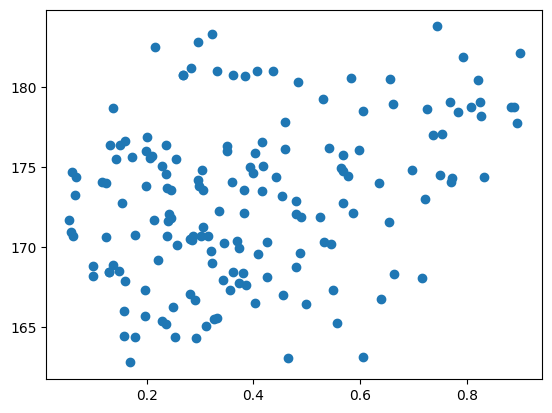

In [129]:
plt.scatter(height_meat_tempWinterSummer_crop_gdp_freedom['freedom_of_expression_mean1789_2023'], height_meat_tempWinterSummer_crop_gdp['AvgHgtBoysAge19'])
plt.show()

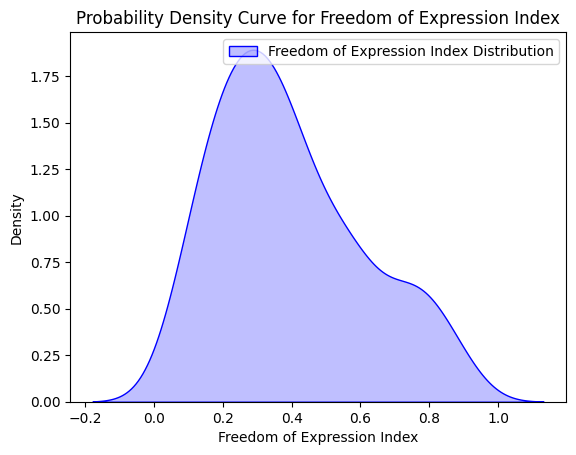

In [160]:
sns.kdeplot(height_meat_tempWinterSummer_crop_gdp_freedom['freedom_of_expression_mean1789_2023'], fill=True, color="blue", label="Freedom of Expression Index Distribution")

# Add labels and title
plt.xlabel('Freedom of Expression Index')
plt.ylabel('Density')
plt.title('Probability Density Curve for Freedom of Expression Index')
plt.legend()

# Show the plot
plt.show()

In [161]:
model_ds = height_meat_tempWinterSummer_crop_gdp_freedom.dropna()

In [162]:
Y = model_ds['AvgHgtBoysAge19']
X = model_ds['freedom_of_expression_mean1789_2023']

X = sm.add_constant(X)

model_freedom = sm.OLS(Y, X).fit()

print(model_freedom.summary())

                            OLS Regression Results                            
Dep. Variable:        AvgHgtBoysAge19   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     16.05
Date:                Mon, 23 Dec 2024   Prob (F-statistic):           9.77e-05
Time:                        03:01:43   Log-Likelihood:                -445.40
No. Observations:                 149   AIC:                             894.8
Df Residuals:                     147   BIC:                             900.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [150]:
healthcare_spending_ds = pd.read_csv('/content/drive/MyDrive/Data Projects/Height vs Weather/healthcare-expenditure-vs-gdp.csv')
healthcare_spending_ds.columns = ['country', 'Code', 'Year', 'health_expenditure_pc', 'gdp', 'population', 'region']
healthcare_spending_ds = healthcare_spending_ds.dropna(subset=['health_expenditure_pc'])

In [151]:
healthcare_spending_ds.head(3)

,country,Code,Year,health_expenditure_pc,gdp,population,region
0,Afghanistan,AFG,2002,87.46503,1280.4631,21378123.0,NaN
1,Afghanistan,AFG,2003,86.22930,1292.3335,22733054.0,NaN
2,Afghanistan,AFG,2004,93.92630,1260.0605,23560656.0,NaN


In [153]:
healthcare_spending_ds.describe(include='all')

,country,Code,Year,health_expenditure_pc,gdp,population,region
count,4232,3959,4232.000000,4232.000000,4076.000000,4.064000e+03,0
unique,204,191,NaN,NaN,NaN,NaN,0
top,Lithuania,PRT,NaN,NaN,NaN,NaN,NaN
freq,22,22,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.059783,1176.941095,18631.180327,1.106795e+08,NaN
std,NaN,NaN,6.074303,1540.901529,19931.576341,5.896755e+08,NaN
min,NaN,NaN,2000.000000,6.717034,621.249300,9.566000e+03,NaN
25%,NaN,NaN,2005.000000,170.686532,4057.299925,1.954353e+06,NaN
50%,NaN,NaN,2010.000000,558.141315,11506.782000,8.012760e+06,NaN
75%,NaN,NaN,2015.000000,1516.699700,26684.979000,2.846225e+07,NaN


In [155]:
healthcare_spending_2000_2021 = healthcare_spending_ds.groupby('country')['health_expenditure_pc'].mean().reset_index()
healthcare_spending_2000_2021.columns = ['country', 'health_expenditure_pc_mean2000_2021']
healthcare_spending_2000_2021.head(3)

,country,health_expenditure_pc_mean2000_2021
0,Afghanistan,178.424240
1,Albania,525.843899
2,Algeria,600.313116


In [157]:
height_meat_tempWinterSummer_crop_gdp_freedom_health = height_meat_tempWinterSummer_crop_gdp_freedom.merge(healthcare_spending_2000_2021, on = 'country', how = 'left')
height_meat_tempWinterSummer_crop_gdp_freedom_health.head(3)

,country,AverageHeightBoysAge19,AverageHeightGirlsAge19,AvgHgtBoysAge19,AvgHgtGirlsAge19,AverageHeightBoysAge15,AverageHeightGirlsAge15,AverageHeightBoysAge10,AverageHeightGirlsAge10,AverageHeightBoysAge5,AverageHeightGirlsAge5,meat_kg_per_capita,Average surface temperature,temp_winter,temp_summer,cereals_tonnes_per_hectare,normalized_temp,gdp_per_capita_mean1990_2022,freedom_of_expression_mean1789_2023,health_expenditure_pc_mean2000_2021
0,India,166.50,155.18,166.50,155.18,159.01,152.39,132.57,132.85,107.07,107.19,4.014139,23.878506,20.390241,27.347545,1.972719,9.878506,3815.900745,0.402157,147.227799
1,China,175.66,163.46,175.66,163.46,171.23,162.44,141.87,143.40,113.41,114.91,30.824999,6.740662,-1.826974,15.268593,4.066310,7.259338,7643.373070,0.209404,440.749130
2,Indonesia,166.26,154.36,166.26,154.36,160.52,153.02,132.30,133.46,107.83,107.55,7.956240,24.604596,24.612968,24.596283,3.556339,10.604596,7753.425785,0.250201,238.858617


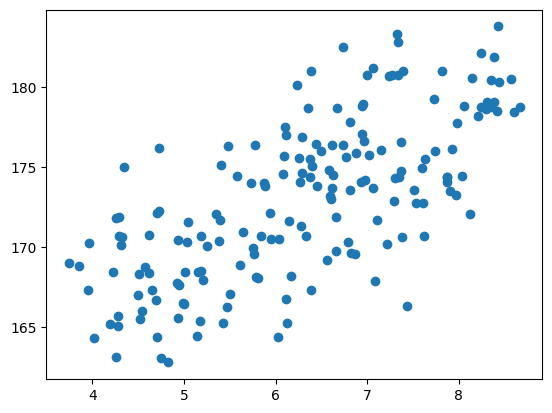

In [167]:
plt.scatter(np.log(height_meat_tempWinterSummer_crop_gdp_freedom_health['health_expenditure_pc_mean2000_2021']), height_meat_tempWinterSummer_crop_gdp['AvgHgtBoysAge19'])
plt.show()

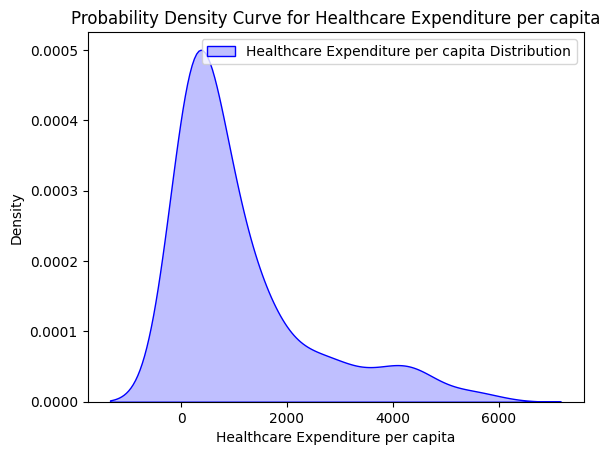

In [168]:
sns.kdeplot(height_meat_tempWinterSummer_crop_gdp_freedom_health['health_expenditure_pc_mean2000_2021'], fill=True, color="blue", label="Healthcare Expenditure per capita Distribution")

# Add labels and title
plt.xlabel('Healthcare Expenditure per capita')
plt.ylabel('Density')
plt.title('Probability Density Curve for Healthcare Expenditure per capita')
plt.legend()

# Show the plot
plt.show()

In [169]:
model_ds = height_meat_tempWinterSummer_crop_gdp_freedom_health.dropna()

In [170]:
Y = model_ds['AvgHgtBoysAge19']
X = model_ds['health_expenditure_pc_mean2000_2021']

X = sm.add_constant(X)

model_freedom = sm.OLS(Y, X).fit()

print(model_freedom.summary())

                            OLS Regression Results                            
Dep. Variable:        AvgHgtBoysAge19   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     103.5
Date:                Mon, 23 Dec 2024   Prob (F-statistic):           1.04e-18
Time:                        03:06:50   Log-Likelihood:                -410.86
No. Observations:                 148   AIC:                             825.7
Df Residuals:                     146   BIC:                             831.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co